In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanicsurvival/df_EDA.csv
/kaggle/input/titanicsurvival/df_test_EDA.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics


In [5]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot, graphviz


In [6]:
#path = 'https://raw.githubusercontent.com/VivekJeldi/Titanic-Survival/main/df_EDA.csv'

path = '/kaggle/input/titanicsurvival/df_EDA.csv'

In [7]:
df = pd.read_csv(path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    int64  
 1   Survived     890 non-null    int64  
 2   Pclass       890 non-null    int64  
 3   Name         890 non-null    object 
 4   Sex          890 non-null    object 
 5   Age          890 non-null    float64
 6   SibSp        890 non-null    int64  
 7   Parch        890 non-null    int64  
 8   Ticket       890 non-null    object 
 9   Fare         890 non-null    float64
 10  Embarked     890 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [9]:
df['Survived'] = df['Survived'].astype('category')

In [10]:
 df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
df = df.drop(['PassengerId','Name','Ticket'], 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
cat_vars = ['Sex','Embarked','Pclass']

le = LabelEncoder()
df[cat_vars] = df[cat_vars].apply(le.fit_transform)

df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,22.0,1,0,7.2500,2
1,1,0,0,38.0,1,0,71.2833,0
2,1,2,0,26.0,0,0,7.9250,2
3,1,0,0,35.0,1,0,53.1000,2
4,0,2,1,35.0,0,0,8.0500,2


In [13]:
y = df['Survived']
X = df.drop('Survived', 1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [15]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
708,2,1,26.507589,1,1,15.2458,0
239,1,1,33.000000,0,0,12.2750,2
381,2,1,32.000000,0,0,7.9250,2
792,0,1,41.244200,0,0,30.6958,0
672,1,1,31.000000,0,0,13.0000,2


In [16]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
280,2,1,65.0,0,0,7.7500,1
434,0,0,14.0,1,2,120.0000,2
39,2,0,14.0,1,0,11.2417,0
417,1,1,30.0,0,0,13.0000,2
585,1,1,47.0,0,0,15.0000,2


In [17]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
y_pred = dt_default.predict(X_test)

In [19]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.78        98
           1       0.72      0.79      0.75        80

    accuracy                           0.76       178
   macro avg       0.76      0.77      0.76       178
weighted avg       0.77      0.76      0.76       178



In [20]:
metrics.confusion_matrix(y_test, y_pred)

array([[73, 25],
       [17, 63]])

In [21]:
dt_default.feature_importances_

array([0.08195811, 0.28584898, 0.25078121, 0.05754985, 0.03469919,
       0.25770714, 0.03145551])

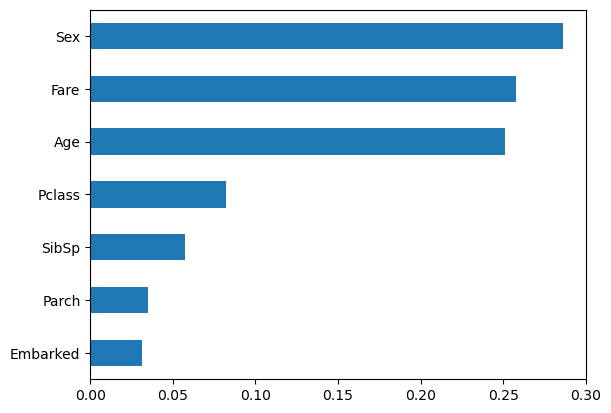

In [22]:
feat_importances = pd.Series(dt_default.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()

In [23]:
features = list(X_train.columns)

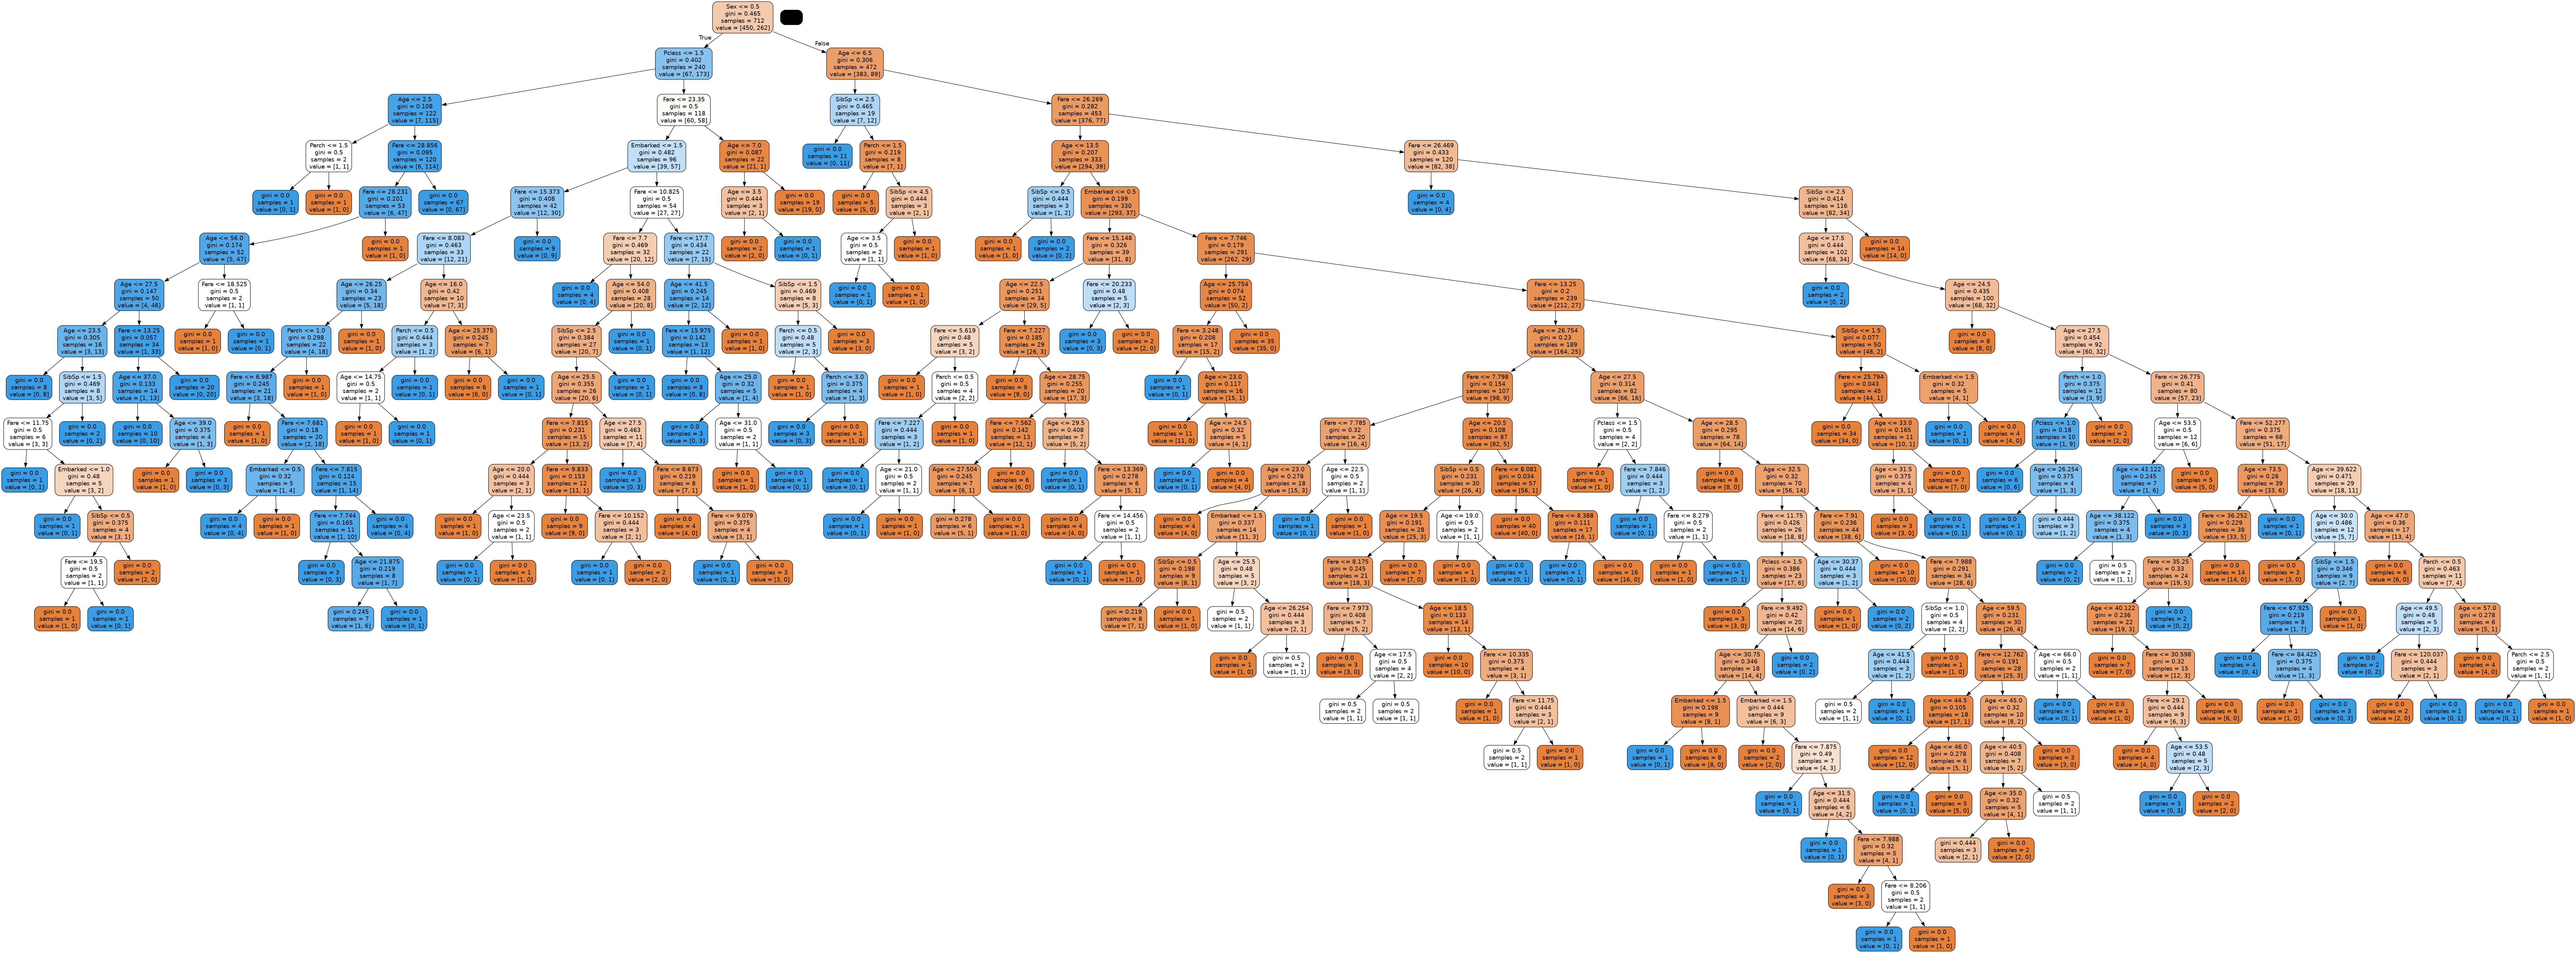

In [24]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [25]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,22.0,1,0,7.2500,2
1,0,0,38.0,1,0,71.2833,0
2,2,0,26.0,0,0,7.9250,2
3,0,0,35.0,1,0,53.1000,2
4,2,1,35.0,0,0,8.0500,2


In [26]:
X['Pclass'] = X['Pclass'].map(lambda x:1 if x in [0,1] else 0)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [28]:
#  #col = ['Sex', 'Age', 'Fare', 'Cabin_G','SibSp','Embarked_S','Parch','Cabin_F','Pclass_3','Cabin_C']
# col = X_train.columns.drop(['Pclass','Embarked','Parch'])
col = X_train.columns

In [29]:
dt_2 = DecisionTreeClassifier(random_state=42)
dt_2.fit(X_train[col],y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
y_pred = dt_2.predict(X_test[col])

In [31]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        98
           1       0.75      0.79      0.77        80

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.79       178
weighted avg       0.79      0.79      0.79       178



In [32]:
metrics.confusion_matrix(y_test, y_pred)

array([[77, 21],
       [17, 63]])

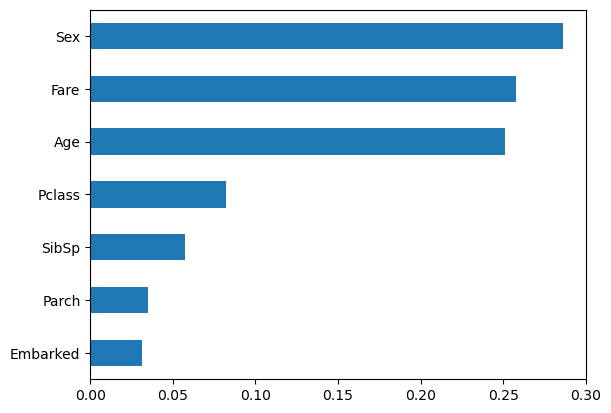

In [33]:
feat_importances = pd.Series(dt_default.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()

In [34]:
#col = ['Sex', 'Age', 'SibSp', 'Pclass_2', 'Pclass_3', 'Cabin_E', 'Embarked_S']

In [35]:
test_path ='https://raw.githubusercontent.com/VivekJeldi/Titanic-Survival/main/df_EDA_Test.csv'


In [36]:
test = pd.read_csv(test_path)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,E,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,E,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,F,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,E,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,E,S


In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [38]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [39]:
cat_vars

['Sex', 'Embarked', 'Pclass']

In [40]:
test[cat_vars] = test[cat_vars].apply(le.fit_transform)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,2,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,E,1
1,893,2,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,E,2
2,894,1,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,F,1
3,895,2,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,E,2
4,896,2,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,E,2


In [41]:
dtree = DecisionTreeClassifier()
dtree.fit(X[col], y)

DecisionTreeClassifier()

In [42]:
pred_prob = dtree.predict_proba(test[col])

In [43]:
pred_df = pd.DataFrame(pred_prob)
pred_df.head()

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [44]:
pred_1 = pred_df.iloc[:,1]
pred_1_df = pd.DataFrame(pred_1)
pred_1_df.head()

,1
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0


In [45]:
test_pred = pd.concat([test['PassengerId'], pred_1_df], 1)
#test_pred['Survived'] = test_pred.loc[:,1].map(lambda x:1 if x>0.6 else 0)
test_pred = test_pred.rename(columns={1: 'Survived'})
test_pred['Survived'] = test_pred['Survived'].astype('int32')
test_pred.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,1


In [46]:
test_pred.to_csv('DecisionTree_Default_4_2.csv', index=False)